## Object Detection

Let's start with a few terms

* **Transformers** : A transformer is a type of neural network architecture introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017. Transformers are designed to process sequences of data, such as sentences in natural language, and have since become a fundamental building block in various deep learning applications.
* **LLMs** :  a large language model, like GPT-3 (Generative Pre-trained Transformer 3), is a specific implementation of a transformer architecture that has been pre-trained on a massive amount of text data to perform language-related tasks. GPT-3, for instance, is a powerful language model developed by OpenAI that can generate coherent and contextually relevant text given a prompt. It can be fine-tuned for specific tasks, such as translation, summarization, question answering, and more.
* **Embeddings** : An embedding is a way to represent and encode objects, such as words or items, as vectors in a continuous vector space. Embeddings are commonly used in machine learning and natural language processing (NLP) to capture semantic relationships and similarities between objects.
* **Vector** : an embedding is essentially a vector, but the term "embedding" is often used in the context of machine learning to emphasize the idea that objects are being placed into a continuous vector space for the purpose of capturing meaningful relationships and patterns.

*Source : Responses from questions to OpenAI ChatGPT*

We'll be using Python (3.11), Pytorch (a Machine Learning Library), SentenceTransformer (A tool to generate text and image embeddings based on Pytorch) and a few other utilities (PIL, Matplotlib, Numpy) to help display 
some of the objects we'll be using.

#### Load the needed Python libraries
The first step is to simply import the libraries we'll be using through the tests.

In [ ]:
import requests
from PIL import Image, ImageDraw
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Recent uses of Neural Networks

The following demonstrates probably the most widely used use of neural networks to do tasks such as image classification. We'll first load an image and use the detr-resnet-50 model to do image classification and determine where on the image the objects exist. The Transformers library and pipeline function make it very simple to consume and use the model. The object detection finds objects of interest on images and returns the location in the image. This could be done on images or run on individual frames of videos.

In [22]:
image = Image.open('images/apple.png')

object_detector = pipeline('object-detection', model='facebook/detr-resnet-50')
result = object_detector(image)
result

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model conf

[{'score': 0.996722400188446,
  'label': 'apple',
  'box': {'xmin': 209, 'ymin': 324, 'xmax': 873, 'ymax': 954}}]

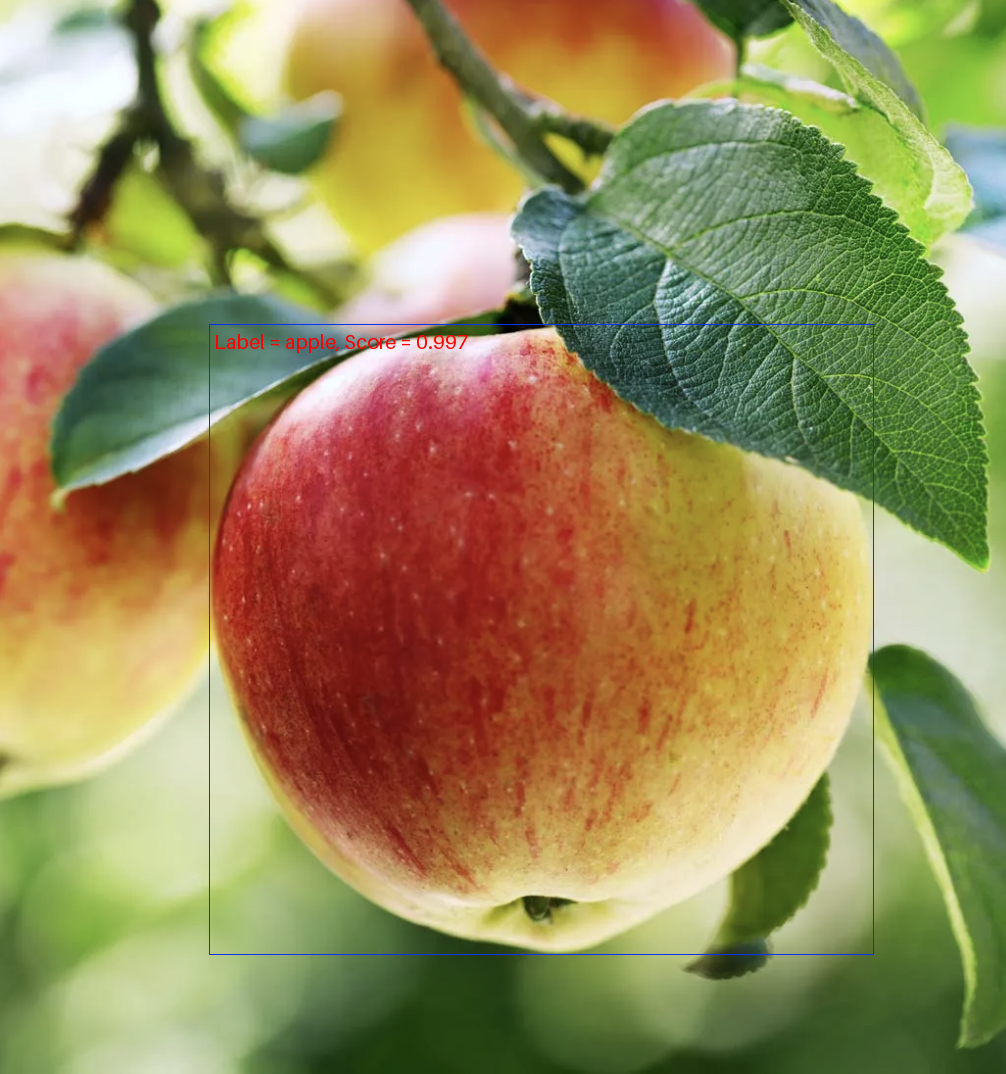

In [23]:
for r in result:
    i = ImageDraw.Draw(image)
    i.rectangle([(r['box']['xmin'],
                  r['box']['ymin']),
                 ((r['box']['xmax'],
                  r['box']['ymax']))], outline=(10,50,240))
    i.text((r['box']['xmin']+ 5,
            r['box']['ymin'] + 5),
           f"Label = {r['label']}, Score = {r['score']:.3f}",
           fill=(255, 0, 0),
           font_size=20)
display(image)